In [1]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

p = Symbol('p')
z = Symbol('z')
s = sympy.Symbol('s')       # define `s` as symbol
j = complex(0,1)

try:
    import bodas
except:
    %pip install bodas
    import bodas

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d
from control import bode_plot, nyquist_plot
from control_materials import *

Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found
This is a library of useful functions for the control systems in 16.06


## Lag vs gain (19-4)

In [2]:
G = 50*tf([1],np.convolve((1,4),np.convolve((1,2),(1,3))))
K=10
selected_zero=2/3;
Gc_lag = tf([1, selected_zero],[1, selected_zero/K])

w = np.sort(np.append(logspace(-2,2,500),1))
[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[GGcm,GGcp,GGcw] = bode_plot(Gc_lag*G,plot=False,omega=w)
[Lm,Lp,Lw] = bode_plot(K*G,plot=False,omega=w)

wc_lag = find_wc(w,GGcm)
wc_gain = find_wc(w,Lm)

print(f"{wc_lag = :4.2f} rad/sec")


wc_lag = 2.26 rad/sec


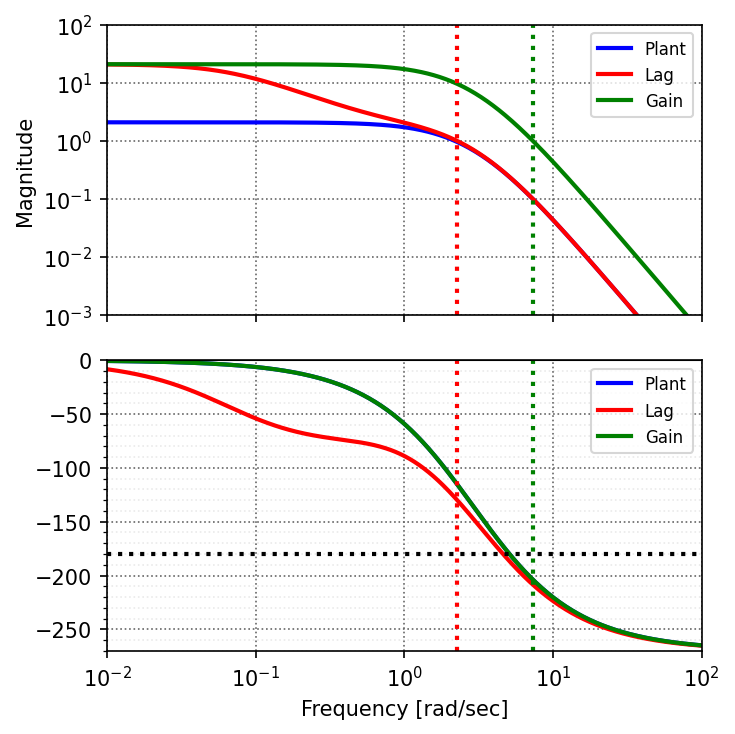

In [3]:

fig, ax = plt.subplots(2,1,figsize=(5,5),dpi=150,sharex=True)
ax[0].loglog(Gw,Gm,'b-',label='Plant')
ax[0].loglog(GGcw,GGcm,'r-',label='Lag')
ax[0].loglog(Lw,Lm,'g-',label='Gain')
ax[0].axvline(x=wc_lag,c='r',ls=':')
ax[0].axvline(x=wc_gain,c='g',ls=':')

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='Plant')
ax[1].semilogx(GGcw,r2d*pshift(GGcp),'r-',label='Lag')
ax[1].semilogx(Lw,r2d*pshift(Lp),'g-',label='Gain')
ax[1].axvline(x=wc_lag,c='r',ls=':')
ax[1].axvline(x=wc_gain,c='g',ls=':')
ax[1].axhline(y=-180,c='k',ls=':')

ax[0].legend(fontsize=8)
ax[1].legend(fontsize=8)
ax[0].set_ylim([1e-3,100])
ax[1].set_ylim([-270,0])
#ax.set_xlim([1e-3,1e1])
ax[0].set_ylabel("Magnitude")
ax[1].set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L17_4.pdf',dpi=600)
plt.show()


## Lag Example on 19-5

In [4]:
G = tf(3,np.convolve([1, 1],np.convolve([1, 1],[1/2, 1])))
Gclag = lag_design(gain_inc = 10, gamma = 10, wc = 1)
L = G*Gclag
Gclag

TransferFunction(array([   1.000,    0.100]), array([   1.000,    0.010]))

In [5]:
gain1 = 1
gain2 = 2
w = logspace(-2,np.log10(100),300)

Gcl1 = feedback(gain1*G,1)
Gcl2 = feedback(gain2*G,1)
Gcl = feedback(L,1)

scl = np.roots(Gcl.den[0][0])
scl1 = np.roots(Gcl1.den[0][0])
scl2 = np.roots(Gcl2.den[0][0])

Tf = 30
y_lag1,t_lag1 = step(Gcl1,Tf)
y_lag2,t_lag2 = step(Gcl2,Tf)
y_lag,t_lag = step(Gcl,Tf)

[G1m,G1p,G1w] = bode_plot(gain1*G,plot=False,omega=w)
[G2m,G2p,G2w] = bode_plot(gain2*G,plot=False,omega=w)
[Lm,Lp,Lw] = bode_plot(G*Gclag,plot=False,omega=w)

wc_lag = find_wc(Lw,Lm)
wc_gain1 = find_wc(G1w,G1m)
wc_gain2 = find_wc(G2w,G2m)


Found breakin/out at K = -0.000
At possible locations s = -1.000


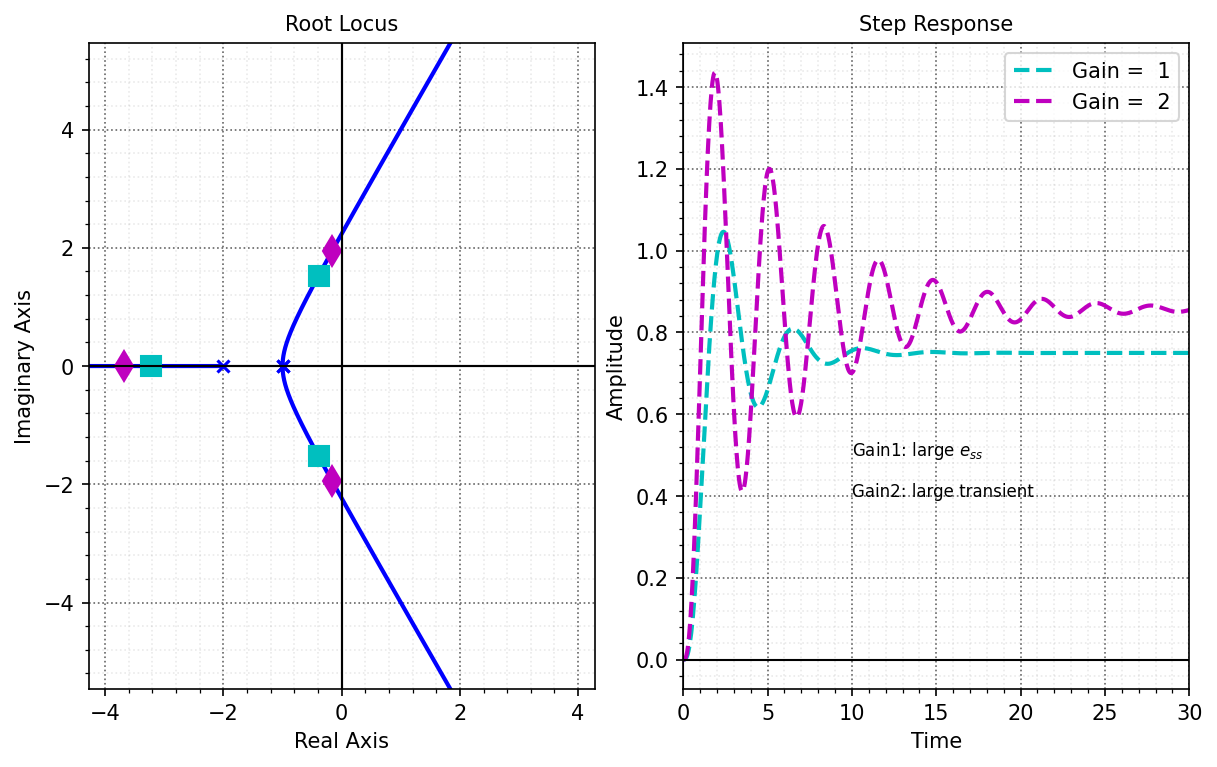

In [6]:
###########
fig, ax = plt.subplots(1,2,figsize=(8, 5),dpi=150,constrained_layout = True,gridspec_kw={'width_ratios': [1, 1]})
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax[0])
ax[0].set_aspect('equal')
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])
ax[0].set_xlabel("Real Axis")
ax[0].set_ylabel("Imaginary Axis")
ax[0].set_title("Root Locus")
ax[0].plot(scl1.real,scl1.imag,'cs',ms=10)
ax[0].plot(scl2.real,scl2.imag,'md',ms=10)
ax[0].set_xlabel("Real Axis")
ax[0].set_ylabel("Imaginary Axis")
ax[0].set_title("Root Locus")
ax[0].axis('equal')
ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])
ax[1].plot(t_lag1,y_lag1,'c--',label=r'Gain = {:2.0f}'.format(gain1))
ax[1].plot(t_lag2,y_lag2,'m--',label=r'Gain = {:2.0f}'.format(gain2))
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Step Response")
ax[1].text(10, 0.5, r"Gain1: large $e_{ss}$", fontsize=8, ha='left')
ax[1].text(10, 0.4, r"Gain2: large transient ", fontsize=8, ha='left')
nicegrid(ax)
plt.legend()
savefig('./figs/L17_5.pdf',dpi=600)
plt.show()


Found breakin/out at K = -0.000
At possible locations s = -1.000


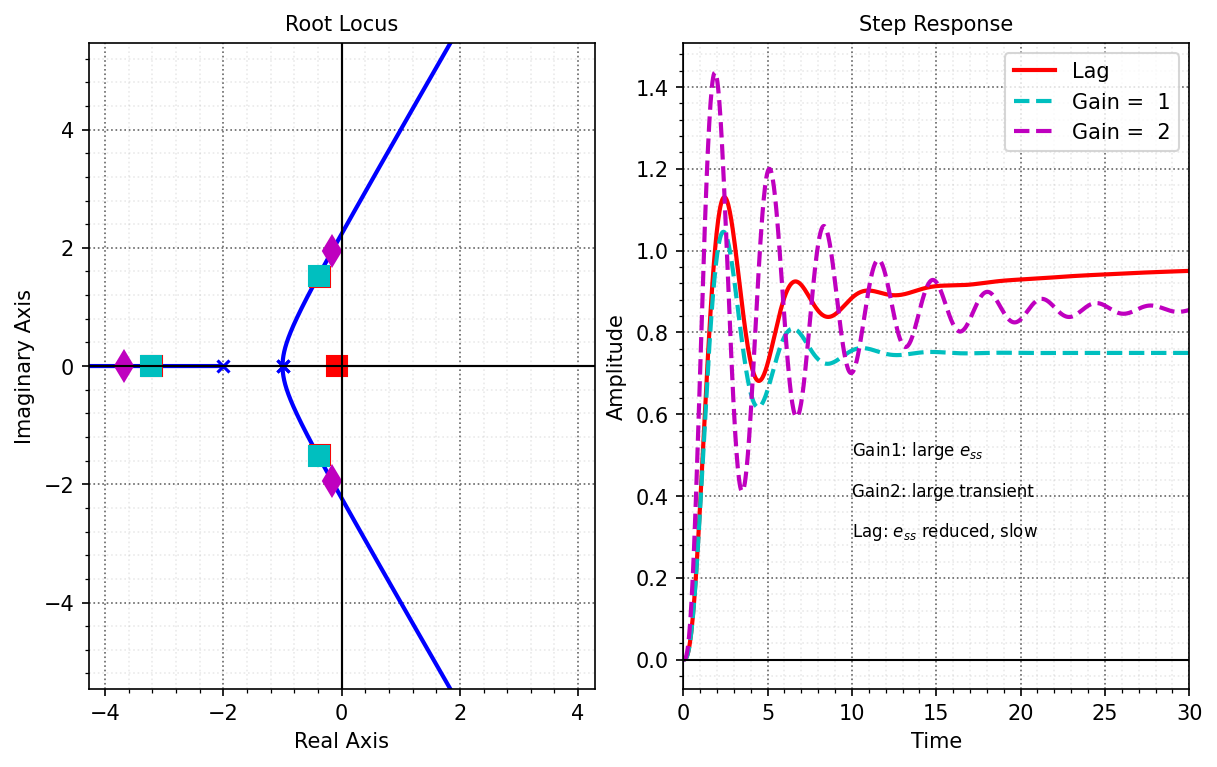

In [7]:
fig, ax = plt.subplots(1,2,figsize=(8, 5),dpi=150,constrained_layout = True,gridspec_kw={'width_ratios': [1, 1]})
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax[0])
ax[0].set_aspect('equal')
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])
ax[0].plot(scl.real,scl.imag,'rs',ms=10)
ax[0].plot(scl1.real,scl1.imag,'cs',ms=10)
ax[0].plot(scl2.real,scl2.imag,'md',ms=10)
ax[0].set_xlabel("Real Axis")
ax[0].set_ylabel("Imaginary Axis")
ax[0].set_title("Root Locus")
ax[0].axis('equal')
ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])
ax[1].plot(t_lag,y_lag,'r-',label='Lag')
ax[1].plot(t_lag1,y_lag1,'c--',label=r'Gain = {:2.0f}'.format(gain1))
ax[1].plot(t_lag2,y_lag2,'m--',label=r'Gain = {:2.0f}'.format(gain2))
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Step Response")
ax[1].text(10, 0.5, r"Gain1: large $e_{ss}$", fontsize=8, ha='left')
ax[1].text(10, 0.4, r"Gain2: large transient ", fontsize=8, ha='left')
ax[1].text(10, 0.3, r"Lag: $e_{ss}$ reduced, slow", fontsize=8, ha='left')
nicegrid(ax)
plt.legend()
savefig('./figs/L17_6.pdf',dpi=600)
plt.show()


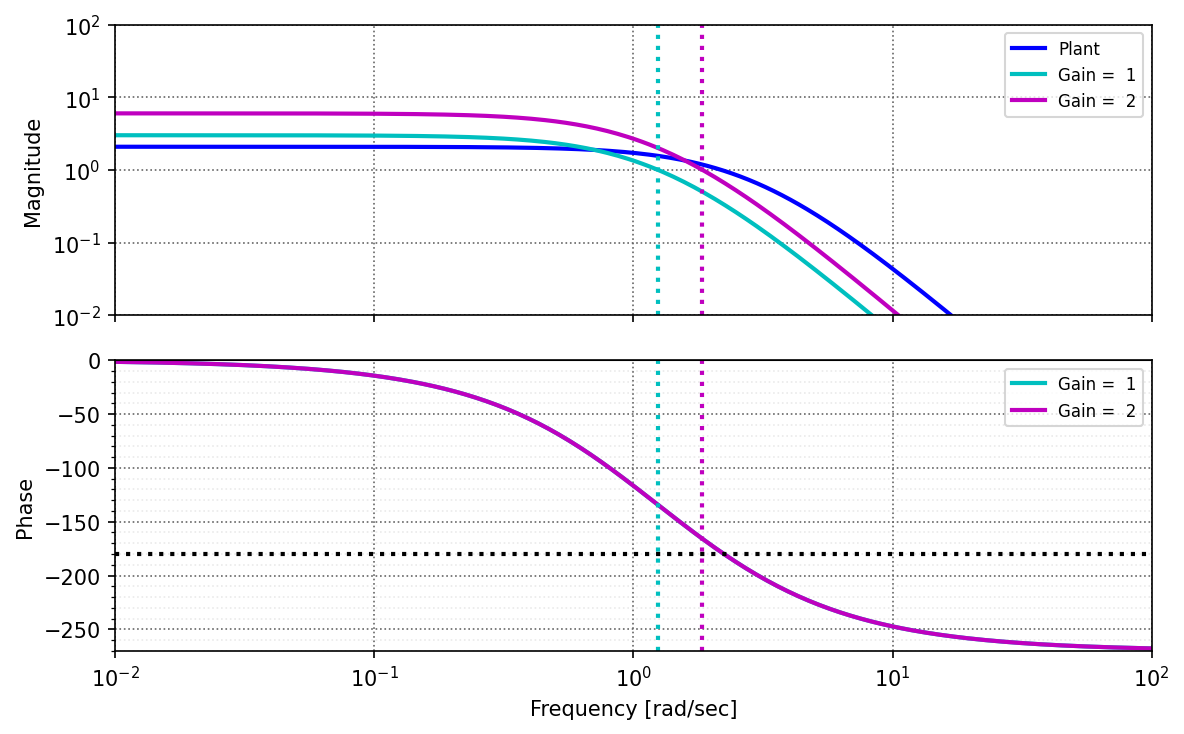

In [8]:
#############
fig, ax = plt.subplots(2,1,figsize=(8,5),dpi=150,sharex=True)
ax[0].loglog(Gw,Gm,'b-',label='Plant')
ax[0].loglog(G1w,G1m,'c-',label=r'Gain = {:2.0f}'.format(gain1))
ax[0].loglog(G2w,G2m,'m-',label=r'Gain = {:2.0f}'.format(gain2))
ax[0].axvline(x=wc_gain1,c='c',ls=':')
ax[0].axvline(x=wc_gain2,c='m',ls=':')
ax[1].semilogx(G1w,pshift(G1p)*r2d,'c-',label=r'Gain = {:2.0f}'.format(gain1))
ax[1].semilogx(G2w,r2d*pshift(G2p),'m-',label=r'Gain = {:2.0f}'.format(gain2))
ax[1].axvline(x=wc_gain1,c='c',ls=':')
ax[1].axvline(x=wc_gain2,c='m',ls=':')
ax[1].axhline(y=-180,c='k',ls=':')

ax[0].legend(fontsize=8);ax[1].legend(fontsize=8)
ax[0].set_ylim([1e-2,100]);ax[1].set_ylim([-270,0])
ax[0].set_ylabel("Magnitude")
ax[1].set_ylabel("Phase")
ax[1].set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L17_5a.pdf',dpi=600)
plt.show()

### Add Lag

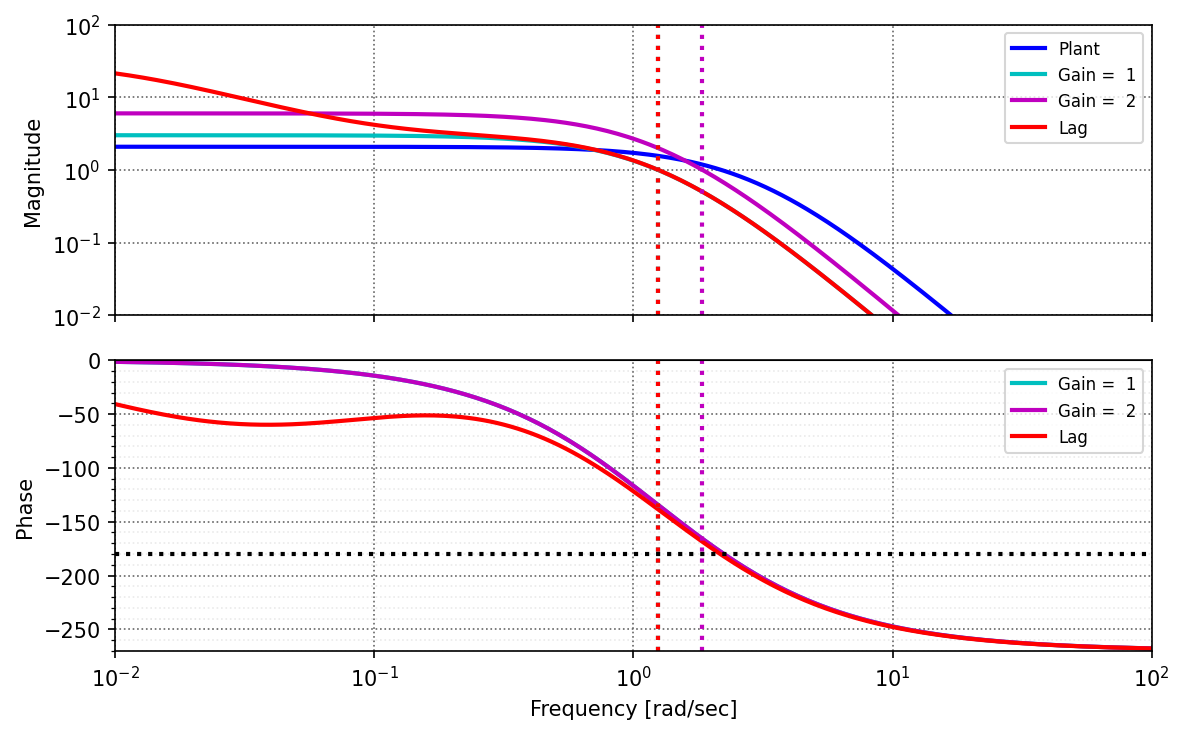

In [9]:
#############
fig, ax = plt.subplots(2,1,figsize=(8,5),dpi=150,sharex=True)
ax[0].loglog(Gw,Gm,'b-',label='Plant')
ax[0].loglog(G1w,G1m,'c-',label=r'Gain = {:2.0f}'.format(gain1))
ax[0].loglog(G2w,G2m,'m-',label=r'Gain = {:2.0f}'.format(gain2))
ax[0].loglog(Lw,Lm,'r-',label='Lag')
ax[0].axvline(x=wc_gain1,c='c',ls=':')
ax[0].axvline(x=wc_gain2,c='m',ls=':')
ax[0].axvline(x=wc_lag,c='r',ls=':')
ax[1].semilogx(G1w,pshift(G1p)*r2d,'c-',label=r'Gain = {:2.0f}'.format(gain1))
ax[1].semilogx(G2w,r2d*pshift(G2p),'m-',label=r'Gain = {:2.0f}'.format(gain2))
ax[1].semilogx(Lw,r2d*pshift(Lp),'r-',label='Lag')
ax[1].axvline(x=wc_gain1,c='c',ls=':')
ax[1].axvline(x=wc_gain2,c='m',ls=':')
ax[1].axhline(y=-180,c='k',ls=':')
ax[1].axvline(x=wc_lag,c='r',ls=':')

ax[0].legend(fontsize=8);ax[1].legend(fontsize=8)
ax[0].set_ylim([1e-2,100]);ax[1].set_ylim([-270,0])
ax[0].set_ylabel("Magnitude")
ax[1].set_ylabel("Phase")
ax[1].set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L17_6a.pdf',dpi=600)
plt.show()

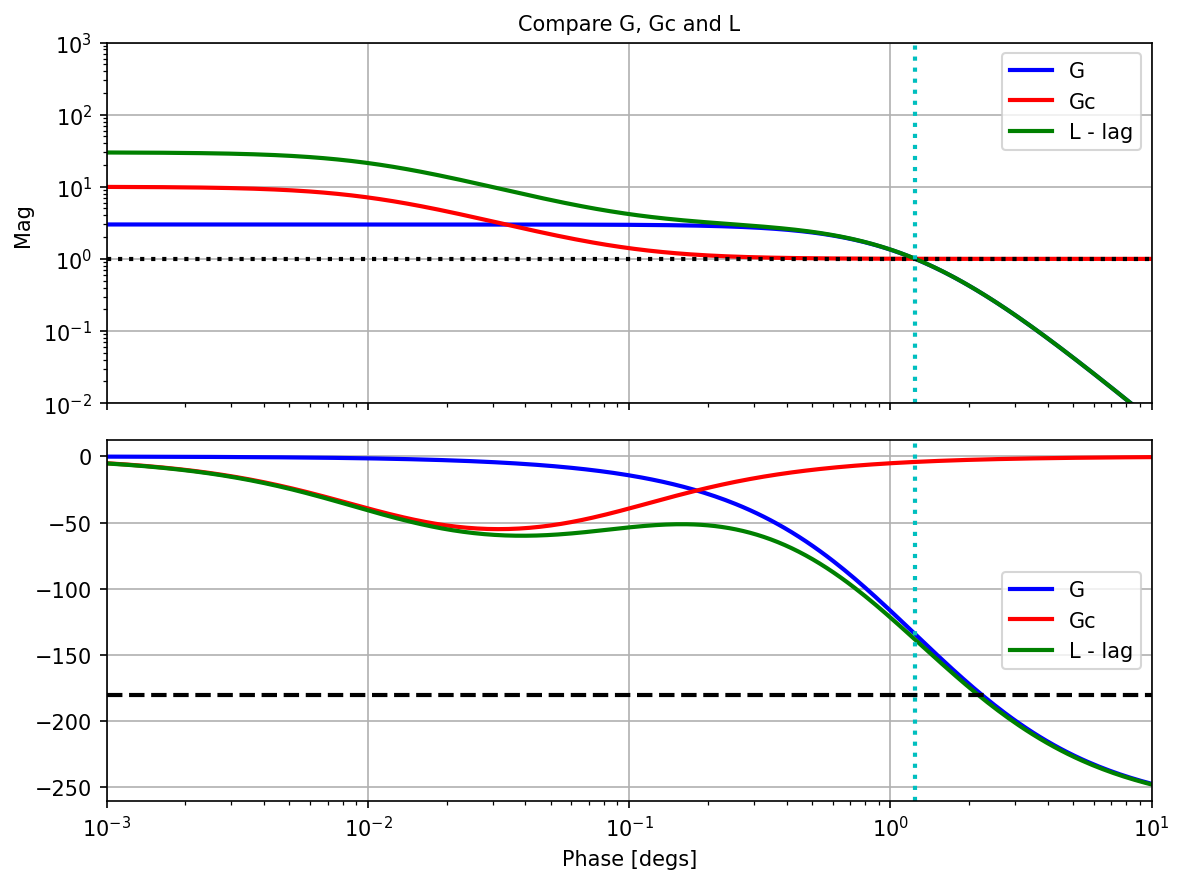

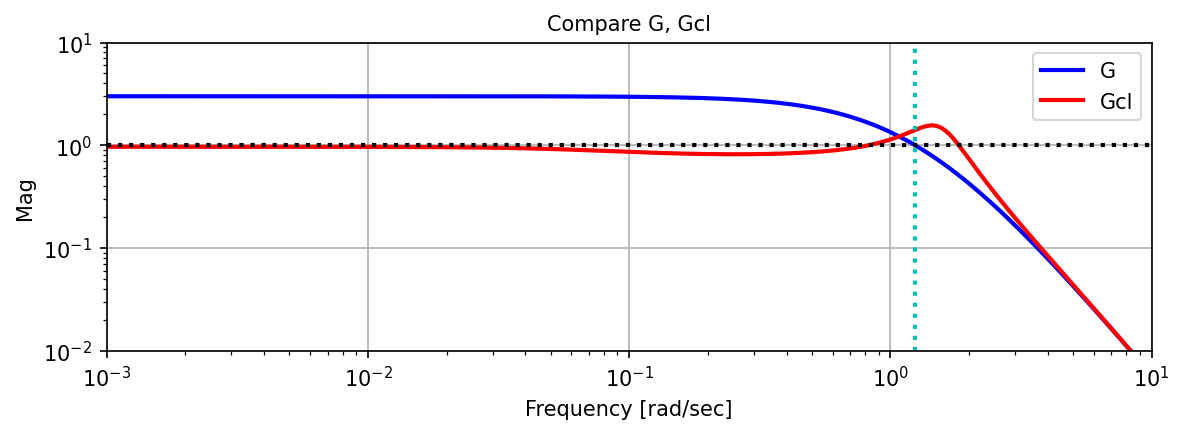

In [10]:
w = logspace(-3,np.log10(10),300)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[Gcm,Gcp,Gcw] = bode_plot(Gclag,plot=False,omega=w)
[Lm,Lp,Lw] = bode_plot(L,plot=False,omega=w)
[Gclm,Gclp,Gclw] = bode_plot(Gcl,plot=False,omega=w)

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gcw,Gcm,'r-',label='Gc')
ax[0].loglog(Lw,Lm,'g-',label='L - lag')
ax[0].axhline(y=1,c='k',ls=":")
ax[0].axvline(x=wc_lag,c='c',ls=":")
ax[0].legend()
ax[0].set_ylim([.01,1000])
ax[0].set_ylabel("Mag ")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gcw,pshift(Gcp)*r2d,'r-',label='Gc')
ax[1].semilogx(Lw,pshift(Lp)*r2d,'g-',label='L - lag')
ax[1].axvline(x=wc_lag,c='c',ls=":")
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
#ax[1].set_ylim([-270,0])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_xlabel("Phase [degs]")
ax[0].set_title("Compare G, Gc and L")
plt.legend()
plt.show()

fig, ax = plt.subplots(1,figsize=(8, 3),dpi=150,sharex = True)
ax.loglog(Gw,Gm,'b-',label='G')
ax.loglog(Gclw,Gclm,'r-',label='Gcl')
ax.axhline(y=1,c='k',ls=":")
ax.axvline(x=wc_lag,c='c',ls=":")
ax.legend()
ax.set_ylim([.01,10])
ax.set_xlim([.001,10])
ax.set_ylabel("Mag")
ax.set_xlabel("Frequency [rad/sec]")
ax.set_title("Compare G, Gcl")
plt.show()

# Bode design 3 (19-16)

In [11]:
G = tf(1,[1, 0]) * tf(1,[1, 1])
wc_des = 1
PM = 45
Kv_des = 10 # current Kv is 1
w = np.sort(np.append(logspace(-3,np.log10(20),300),wc_des))

Gf = G(j*wc_des)
Kv_G = find_Kv(G)
print(f"K_v = {Kv_G:.2f} for G")
K_wc = 1/np.abs(Gf)

# so add lag
Gc_lag = lag_design(gain_inc = 10, gamma = 10, wc = wc_des)

L_lag = K_wc*G*Gc_lag
Gcl_lag = feedback(L_lag,1)
Lf = L_lag(j*wc_des)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[Gcm,Gcp,Gcw] = bode_plot(Gc_lag,plot=False,omega=w)
[Lcm,Lcp,Lcw] = bode_plot(L_lag,plot=False,omega=w)

PM_gain = 180+np.interp(1,np.flipud(Gm),np.flipud(Gp)*r2d)
PM_lag = 180+np.interp(1,np.flipud(Lcm),np.flipud(Lcp)*r2d)
print("Loop with gain PM is {:4.2f}".format(PM_gain))
print("Loop with Lag PM is {:4.2f}".format(PM_lag))

K_v = 1.00 for G
Loop with gain PM is 51.82
Loop with Lag PM is 39.78


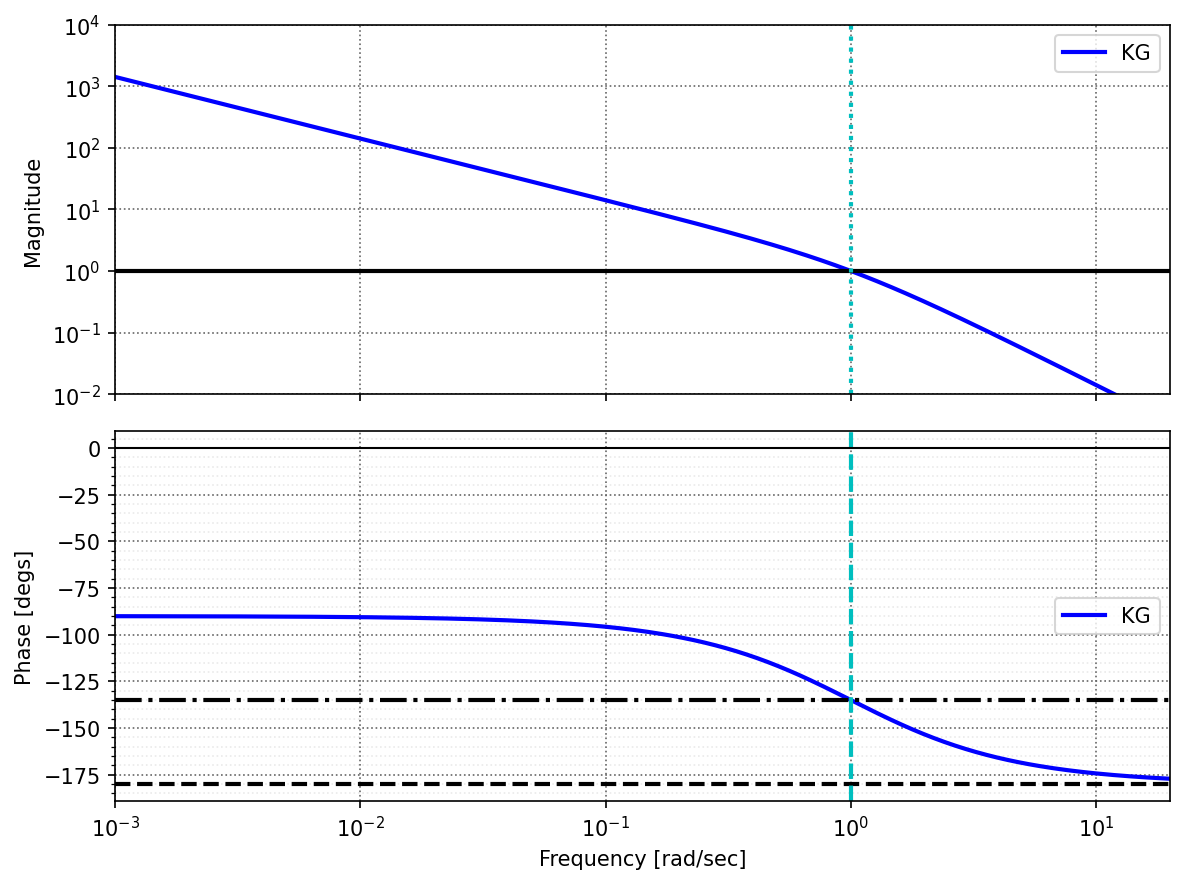

In [12]:
fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,K_wc*Gm,'b-',label='KG')
ax[0].axhline(y=1,c='k',ls="-")
ax[0].axvline(x=wc_des,c='c',ls=":")
ax[0].legend()
ax[0].set_ylim([.01,10000])
ax[0].set_ylabel("Magnitude")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='KG')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axhline(y=-180+PM,c='k',ls="-.")
ax[1].axvline(x=wc_des,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_ylabel("Phase")
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_ylabel("Phase [degs]")
nicegrid(ax)
plt.legend()
savefig("./figs/L17_17p.pdf", dpi=600)
plt.show()

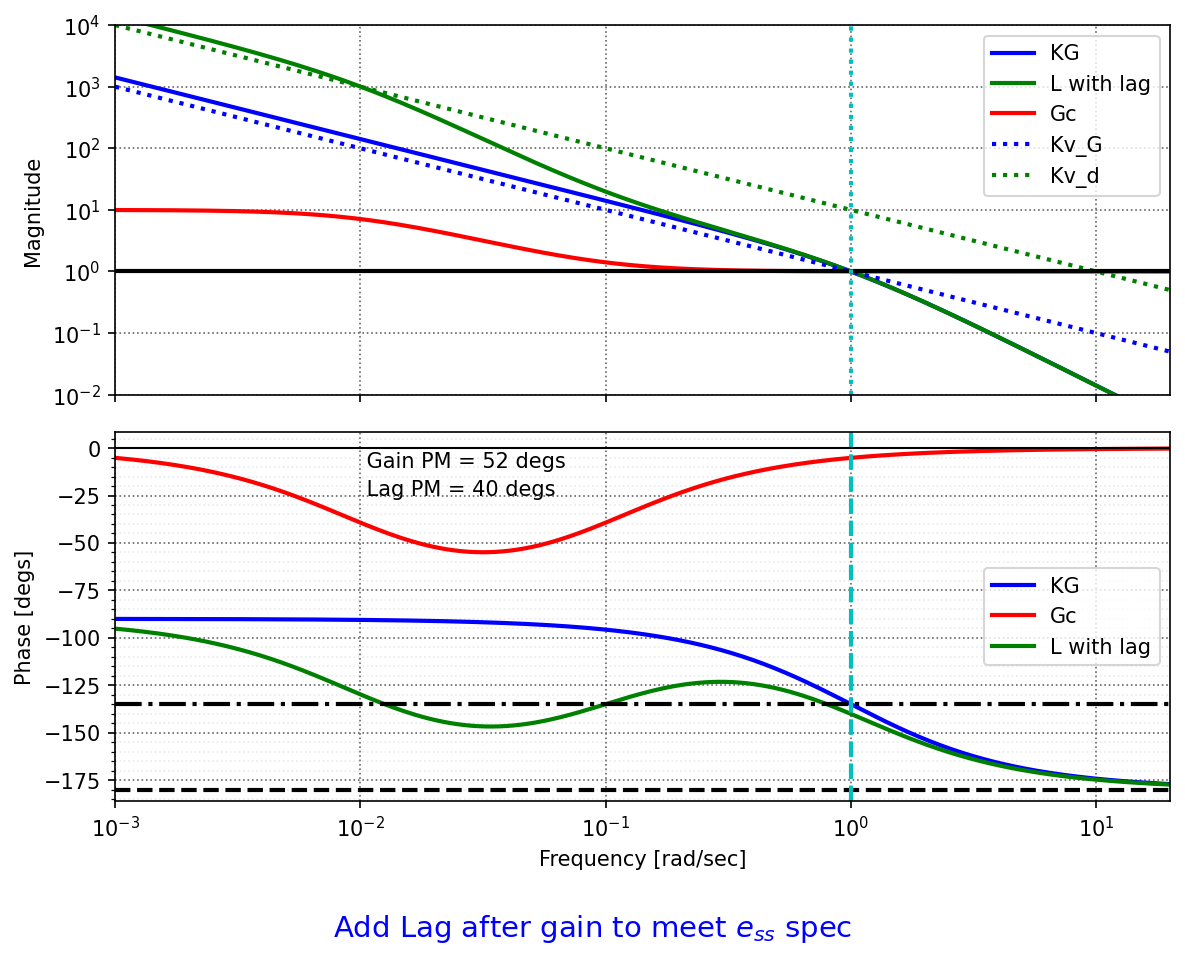

In [13]:
fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,K_wc*Gm,'b-',label='KG')
ax[0].loglog(Lcw,Lcm,'g-',label='L with lag')
ax[0].loglog(Gcw,Gcm,'r-',label='Gc')
ax[0].loglog(Gcw,Kv_G/Gcw,'b:',label='Kv_G')
ax[0].loglog(Gcw,Kv_des/Gcw,'g:',label='Kv_d')
ax[0].axhline(y=1,c='k',ls="-")
ax[0].axvline(x=wc_des,c='c',ls=":")
ax[0].legend()
ax[0].set_ylim([.01,10000])
ax[0].set_xlim([1e-3,1e2])
ax[0].set_ylabel("Magnitude")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='KG')
ax[1].semilogx(Gcw,pshift(Gcp)*r2d,'r-',label='Gc')
ax[1].semilogx(Lcw,pshift(Lcp)*r2d,'g-',label='L with lag')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axhline(y=-180+PM,c='k',ls="-.")
ax[1].axvline(x=wc_des,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_ylabel("Phase")
ax[1].text(.01,-10,' Gain PM ={:3.0f} degs'.format(PM_gain))
ax[1].text(.01,-25,' Lag PM ={:3.0f} degs'.format(PM_lag))
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_ylabel("Phase [degs]")
caption("Add Lag after gain to meet $e_{ss}$ spec",fig)
nicegrid(ax)
plt.legend()
savefig("./figs/L17_17.pdf", dpi=600)
plt.show()

In [14]:
t = linspace(0,40,1000)
y_lag_ramp, t_lag_ramp, x_lag_ramp = lsim(Gcl_lag, T=t, U=t)

L_lag = K_wc*G*Gc_lag
Gcl_K = feedback(K_wc*G,1)
y_K_ramp, t_K_ramp, x_K_ramp = lsim(Gcl_K, T=t, U=t)

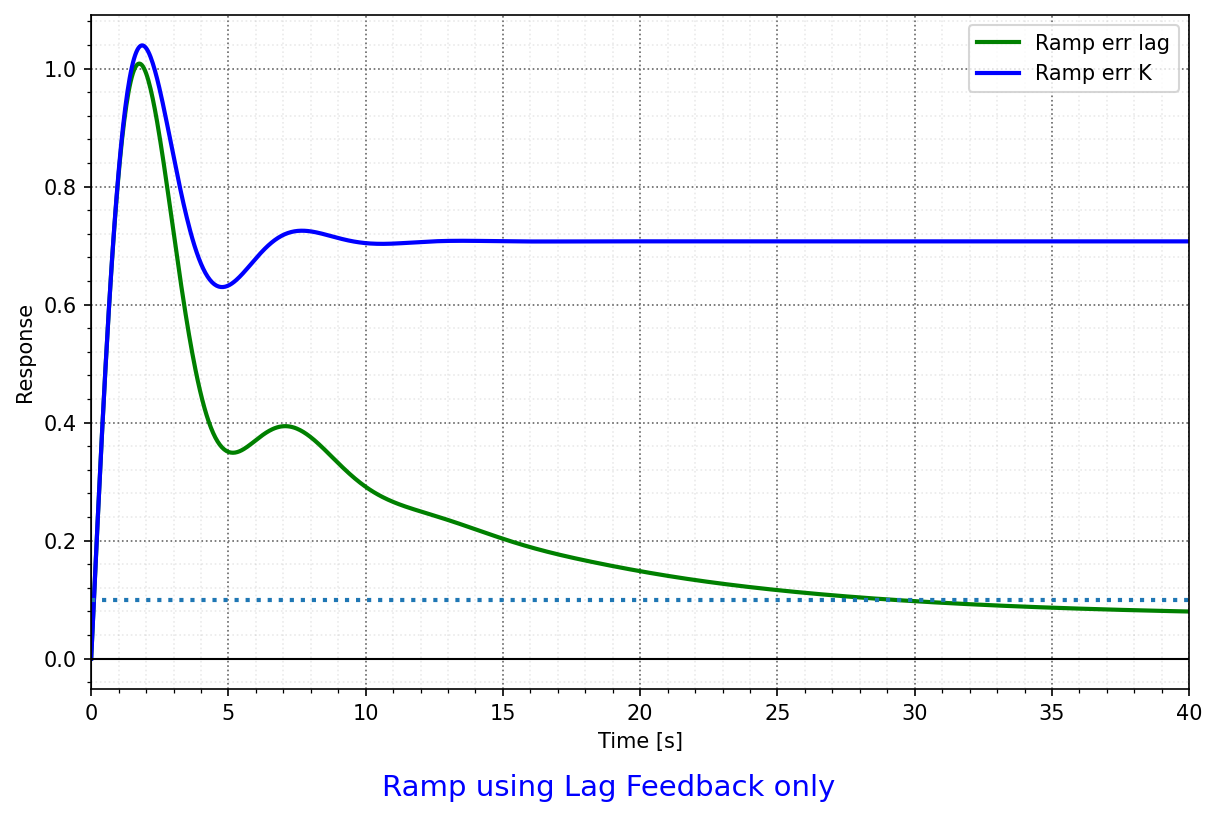

In [15]:
fig, ax = plt.subplots(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t_lag_ramp,(t_lag_ramp - y_lag_ramp),'g-',label='Ramp err lag')
plt.plot(t_K_ramp,(t_K_ramp - y_K_ramp),'b-',label='Ramp err K')
plt.axhline(y=1/Kv_des,ls=':')
nicegrid(ax)
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.legend()
caption("Ramp using Lag Feedback only",fig,yloc=-0.05)
savefig("./figs/L17_17a.pdf", dpi=600)
plt.show()

# Class example (19-19)

In [16]:
G = tf(1,[1, 0]) * tf(1,[1, 1]) * tf(1,[1, 4])

Mp = 0.1325
zeta = 1/np.sqrt( 1 + (np.pi/np.log(Mp))**2 ) 
print(f"{zeta =: 4.2f}")
PM = zeta*100.
Kv_des = 12 # current Kv is much less

Tp = 1
wd = np.pi/Tp
wn = wd/np.sqrt(1-zeta**2)
wc_des = wn*np.sqrt(np.sqrt(1+4*zeta**4) - 2*zeta**2)
print(f"{wc_des =: 4.2f} rad/sec")

# Close loop to meet wc spec
Gf = G(j*wc_des)
K_wc = 1/np.abs(Gf)

Kv_K = find_Kv(K_wc*G)
print("Plant PM is {:4.2f}".format(r2d*pshift((180/r2d+cmath.phase(Gf)))))

zeta = 0.54
wc_des = 2.83 rad/sec
Plant PM is -15.79


In [17]:
# PM negative so add lead
Gc_lead = lead_design(K_wc*G, wc_des = wc_des, PM = PM)
L_K_lead = K_wc*G*Gc_lead
Kv_lead = find_Kv(L_K_lead)

Gc_lag = lag_design(gain_inc = Kv_des/Kv_lead, gamma = 10, wc = wc_des)
print("Lag Gc = ",Gc_lag)

L_lag = L_K_lead*Gc_lag
Kv_lag = find_Kv(L_lag)

Gcl_K = feedback(K_wc*G,1)
Gcl_lag = feedback(L_lag,1)

print("Kv desired   = {:3.2f}".format(Kv_des))
print("Kv with gain = {:3.2f}".format(Kv_K))
print("Kv with lead = {:3.2f}".format(Kv_lead))
print("Kv with lag  = {:3.2f}".format(Kv_lag))

Gc_lag = lag_design(gain_inc = Kv_des/Kv_K, gamma = 10, wc = wc_des)

L = K_wc*G*Gc_lag*Gc_lead
Gcl = feedback(L,1)
Lf = L(j*wc_des)
print("\nDesired PM is {:4.2f}".format(PM))
print("   Loop PM is {:4.2f}".format(180+cmath.phase(Lf)*r2d))

w = np.sort(np.append(logspace(-3,np.log10(100),1000),wc_des))
[L_leadm,L_leadp,L_leadw] = bode_plot(L_K_lead,plot=False,omega=w)
[L_lagm,L_lagp,L_lagw] = bode_plot(L_lag,plot=False,omega=w)


Lag Gc =  <TransferFunction>: sys[78]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s + 0.2828
-----------
s + 0.04342

Kv desired   = 12.00
Kv with gain = 10.39
Kv with lead = 1.84
Kv with lag  = 12.00

Desired PM is 54.11
   Loop PM is 53.34


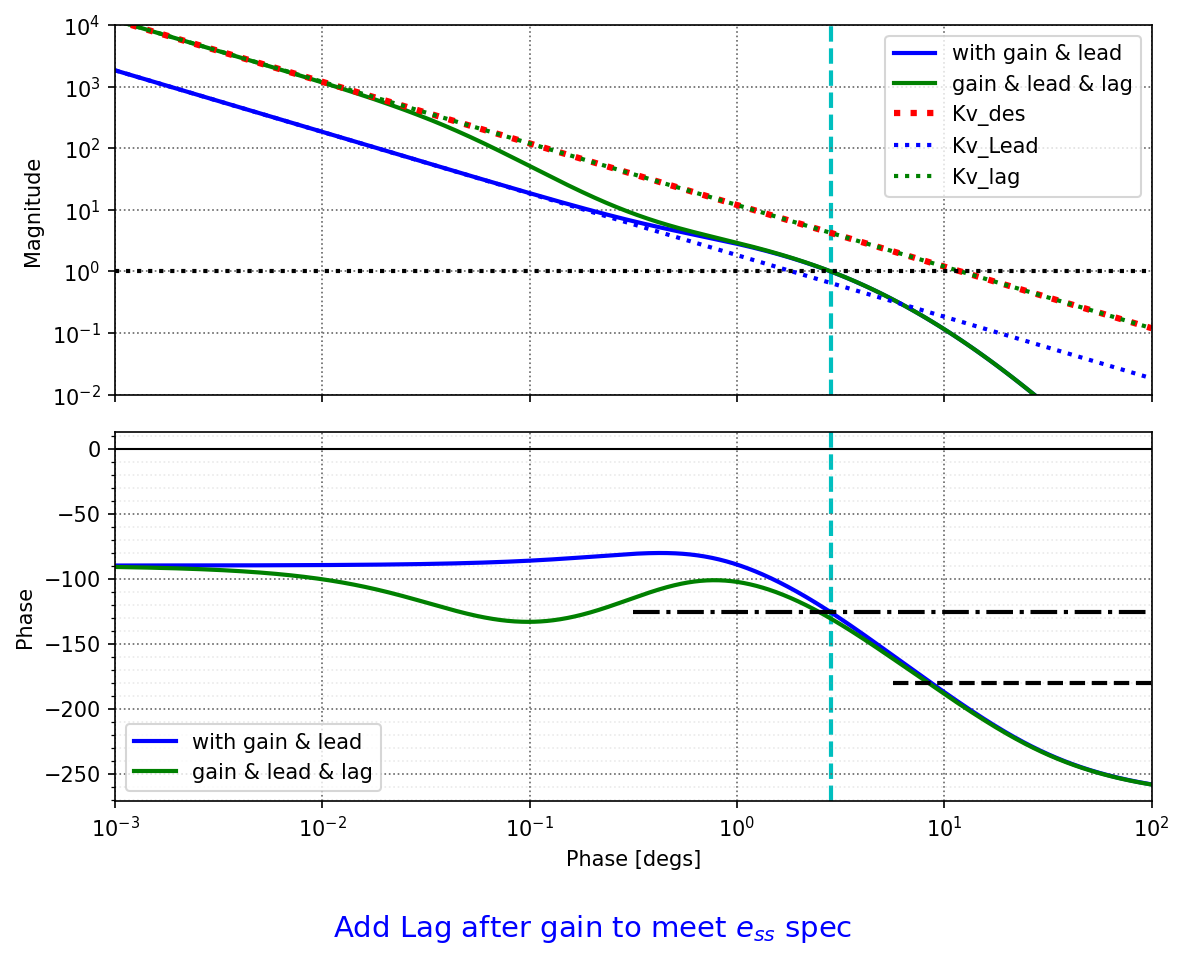

In [18]:

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(L_leadw,L_leadm,'b-',label='with gain & lead')
ax[0].loglog(L_lagw,L_lagm,'g-',label='gain & lead & lag')
ax[0].loglog(L_lagw,Kv_des/L_lagw,'r:',lw=3,label='Kv_des')
ax[0].loglog(L_lagw,Kv_lead/L_lagw,'b:',label='Kv_Lead')
ax[0].loglog(L_lagw,Kv_des/L_lagw,'g:',label='Kv_lag')
ax[0].axhline(y=1,c='k',ls=":")
ax[0].axvline(x=wc_des,c='c',ls="--",zorder=1)
ax[0].legend()
ax[0].set_ylim([.01,10000])
ax[0].set_ylabel("Magnitude")

ax[1].semilogx(L_leadw,L_leadp*r2d,'b-',label='with gain & lead')
ax[1].semilogx(L_lagw,L_lagp*r2d,'g-',label='gain & lead & lag')
ax[1].axhline(y=-180,c='k',ls="--",xmin=0.75)
ax[1].axhline(y=-180+PM,c='k',ls="-.",xmin=0.5)
ax[1].axvline(x=wc_des,c='c',ls="--",zorder=1)
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_ylabel("Phase")
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_xlabel("Phase [degs]")
caption("Add Lag after gain to meet $e_{ss}$ spec",fig)
nicegrid(ax)
plt.legend()
savefig("./figs/L17_18.pdf", dpi=600)
plt.show()


Using Tp
omega_n: 	3.710
zeta   : 	0.515
Tr     : 	0.45s
Ts     : 	2.35s
Mp     : 	0.15
Tp     : 	0.99s
Yss    : 	1.03
Using self.SettlingTimeLimits[0] = 0.02


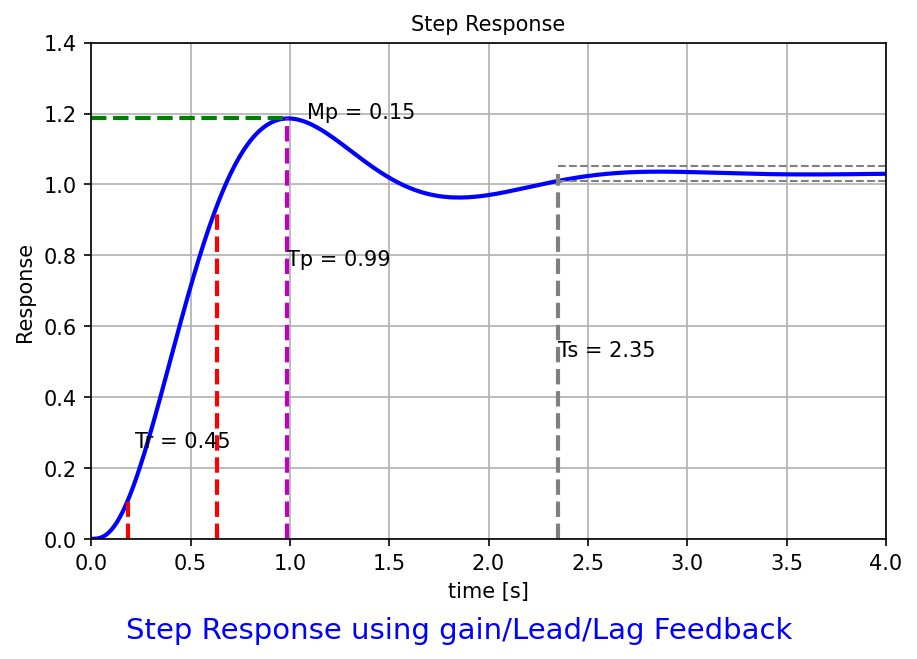

In [30]:
Gcl_gain = feedback(K_wc*G,1)
Gcl_lead = feedback(L_K_lead,1)
Gcl_lag = feedback(L_lag,1)

y,t = step(Gcl_lag,4)

fig, ax = plt.subplots(1,figsize=(6, 4),dpi=150,constrained_layout = True)
S = Step_info(t,y)
S.printout()
S.nice_plot(ax,Ymax=1.4)
caption("Step Response using gain/Lead/Lag Feedback",fig,yloc=-0.05)
savefig("./figs/L17_18a.pdf", dpi=600)
plt.show()

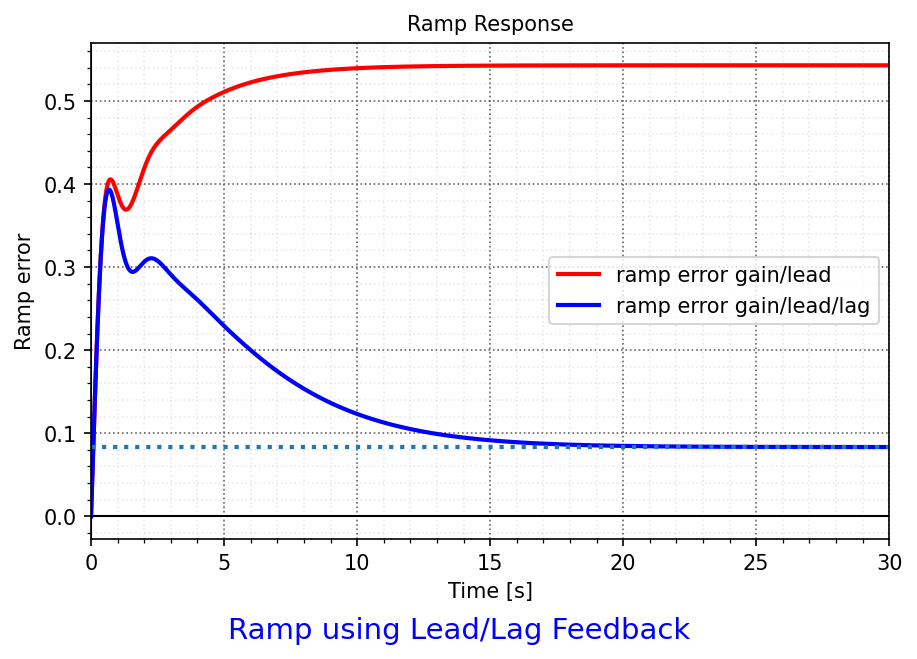

In [33]:
t = linspace(0,30,1000)
y_lead_ramp, t_lead_ramp, x_lead_ramp = lsim(Gcl_lead, T=t, U=t)
y_lag_ramp, t_lag_ramp, x_lag_ramp = lsim(Gcl_lag, T=t, U=t)

fig, ax = plt.subplots(figsize=(6, 4),dpi=150,constrained_layout = True)
plt.plot(t_lead_ramp,(t_lead_ramp - y_lead_ramp),'r-',label='ramp error gain/lead')
plt.plot(t_lag_ramp,(t_lag_ramp - y_lag_ramp),'b-',label='ramp error gain/lead/lag')
plt.axhline(y=1/Kv_des,ls=':')
nicegrid(ax)
plt.xlabel("Time [s]")
plt.ylabel("Ramp error")
plt.title("Ramp Response")
plt.legend()
caption("Ramp using Lead/Lag Feedback",fig,yloc=-0.05)
savefig("./figs/L17_18b.pdf", dpi=600)
plt.show()